# Chaining Tranformers

In [1]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder


In [2]:
estimators = [
  ('simpleImputer', SimpleImputer()),
  ('pca', PCA()),
  ('standardScaler', StandardScaler())
]
cat_est =[
  ('one_hot_encoder', OneHotEncoder())
]
pipe = Pipeline(steps= estimators, memory= 'test_cache_dir')
cat_pipe = Pipeline(steps = cat_est, memory='test_cache_dir')

In [3]:
arr = np.array([[123,234], [234, 324]])
y = [1, 1]
a = pipe.fit_transform(X=arr, y=y)

In [4]:
a

array([[ 1.,  0.],
       [-1.,  0.]])

In [5]:
arr

array([[123, 234],
       [234, 324]])

In [6]:
full_pipe_line = FeatureUnion(transformer_list=
                              [
                                ('num_pipe', pipe),
                                ('cat_pipe', cat_pipe)])

# Data Preprocessing techniques

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# sns.set_theme('whitegrid')

In [8]:
data = [{'age': 4,  'height': 96.0},
        {'age': 1,  'height': 73.9},
        {'age': 2,  'height': 88.9},
        {'age': 3,  'height': 81.6}]

In [9]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
data_transformed

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 2. , 88.9],
       [ 3. , 81.6]])

In [10]:
data_transformed.shape

(4, 2)

# 2. Data Imputation

In [11]:
from sklearn.impute import SimpleImputer


In [12]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
# heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',)
heart_data = pd.read_csv('processed.cleveland.data')
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [13]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [14]:
heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [15]:
heart_data.info()
list(heart_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

In [16]:
print('unique values in ca:', heart_data.ca.unique())
print('unique value in thal:', heart_data.thal.unique())

unique values in ca: ['0.0' '3.0' '2.0' '1.0' '?']
unique value in thal: ['6.0' '3.0' '7.0' '?']


In [17]:
heart_data.replace('?', np.nan, inplace=True)

In [18]:
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
heart_data_imputed.shape

(303, 14)

In [19]:
imputer = SimpleImputer(missing_values= np.nan, strategy= 'mean', 
                        add_indicator= True)
imputer = imputer.fit(heart_data)
heart_data_imputed_with_indicator = imputer.transform(heart_data)
heart_data_imputed_with_indicator.shape

(303, 16)

In [20]:
# a = pd.DataFrame(heart_data_imputed_with_indicator, columns=list(heart_data).extend(['impute1', 'impute2']))

In [21]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    object 
 12  thal      301 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [22]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

## Starting features scalling

In [23]:
cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None, names= cols)

In [24]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### Converting non numerical attribute to numeric attribute

In [25]:
abalone_data = abalone_data.replace({"Sex" : {"M": 1, "F": 2, "I": 3}})
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


### Seprating features from labels
* here the labels are the Rings

In [26]:
y = abalone_data.pop("Rings")
in_cols = list(abalone_data)
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [27]:
abalone_data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,2.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,3.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,3.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


### Visualization of the data
* Histogram
* kernel density estimator (KDE) plot
* Box
* Violin

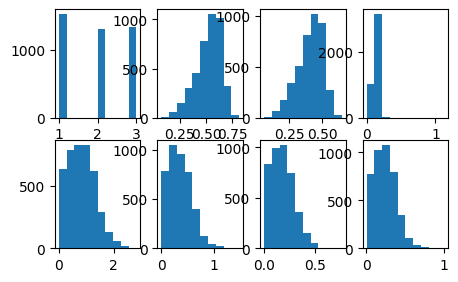

In [28]:
import matplotlib.pyplot as plt
list_of_features = list(abalone_data)
i =0

for x in range(1,3):
  for y in range(1, 5):
    plt.subplot2grid(shape=(3, 5),loc=(x,y), fig= plt.figure(14))
    plt.hist(x=abalone_data[list_of_features[i]])
    i += 1


### KDE plot

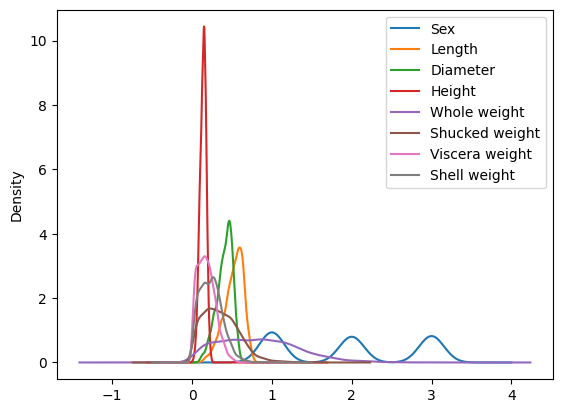

In [29]:
ax = abalone_data.plot.kde()

### Box plot

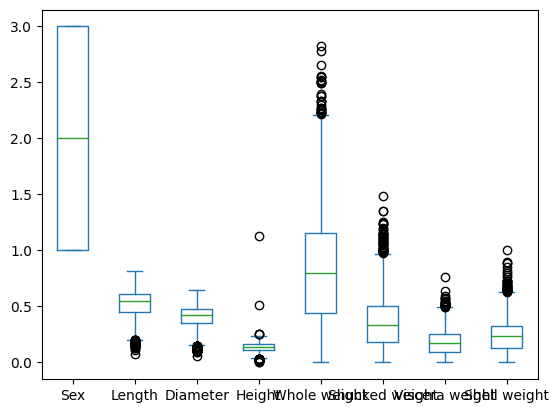

Signature: plt.box(on=None)
Docstring:
Turn the axes box on or off on the current axes.

Parameters
----------
on : bool or None
    The new `~matplotlib.axes.Axes` box state. If ``None``, toggle
    the state.

See Also
--------
:meth:`matplotlib.axes.Axes.set_frame_on`
:meth:`matplotlib.axes.Axes.get_frame_on`
File:      ~/BS/jupyterLab/jupitor_notebook/lib/python3.10/site-packages/matplotlib/pyplot.py
Type:      function

In [30]:
abalone_data.plot.box()
?plt.box

### violine plot

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f39249ee1d0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f39249ee110>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f3924a34100>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f3924a345b0>}

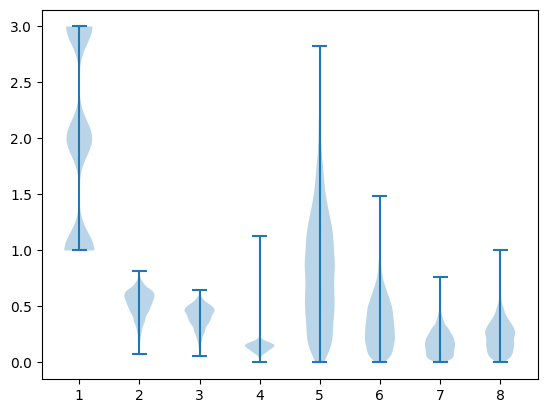

In [31]:
plt.violinplot(abalone_data)

### Scaling
* MaxAbsoluteScaler [-1, 1]
* MinMaxScaler [0, 1]

In [32]:
x = np.array([4, 2, 5, -2, -100]).reshape(-1, 1)
x

array([[   4],
       [   2],
       [   5],
       [  -2],
       [-100]])

Max abs scaler

In [33]:
from sklearn.preprocessing import MaxAbsScaler
max_abs_scaler = MaxAbsScaler()
max_abs_scaler.fit(x)
x_new = max_abs_scaler.transform(x)
x_new

array([[ 0.04],
       [ 0.02],
       [ 0.05],
       [-0.02],
       [-1.  ]])

MinMaxScaler

In [34]:
from sklearn.preprocessing import MinMaxScaler
x = abalone_data
min_max_scaler = MinMaxScaler()
x_normalized = min_max_scaler.fit_transform(x)
x_normalized[:5]


array([[0.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206],
       [0.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109],
       [0.5       , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 ],
       [0.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462],
       [1.        , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 ]])

In [35]:
x_normalized.mean(axis=0)

array([0.47773522, 0.60674608, 0.59307774, 0.12346584, 0.29280756,
       0.24100033, 0.23712127, 0.2365031 ])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3924897f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f39248d4490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3924897c70>,
 'medians': [<matplotlib.lines.Line2D at 0x7f39248d49d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f39248d4c70>,
 'means': []}

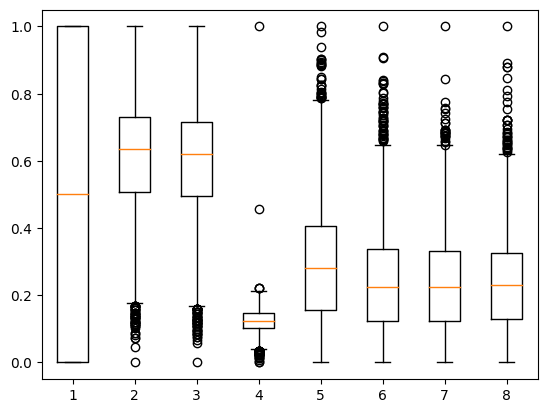

In [36]:
plt.boxplot(x=x_normalized)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f39247ab5b0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f39247ab460>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f39247d5510>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f39247d59c0>}

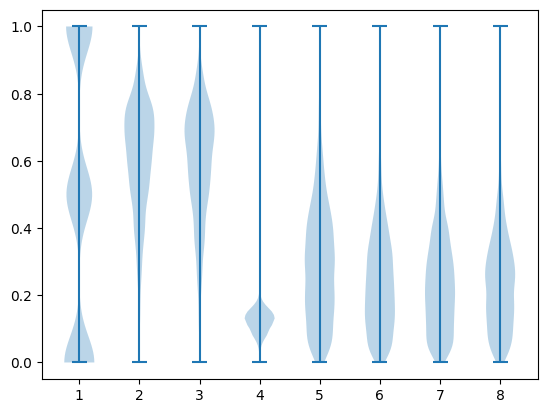

In [37]:
plt.violinplot(x_normalized)

### Standard scaling

In [38]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_std = std_scaler.fit_transform(abalone_data)


In [39]:
x_std.mean(axis=0)

array([-1.19075871e-17, -5.83471770e-16, -3.02792930e-16,  3.91249292e-16,
        9.18585294e-17, -1.02065033e-17,  2.70472337e-16,  2.97689679e-16])

In [40]:
x_std.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

(array([[1.528e+03, 2.649e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [6.950e+02, 3.435e+03, 4.700e+01, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [7.030e+02, 3.435e+03, 3.900e+01, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [6.290e+02, 3.462e+03, 8.400e+01, 0.000e+00, 1.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
        [7.670e+02, 3.193e+03, 2.170e+02, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [7.260e+02, 3.252e+03, 1.980e+02, 1.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [7.740e+02, 3.167e+03, 2.350e+02, 1.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [7.720e+02, 3.197e+03, 2.040e+02, 4.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.

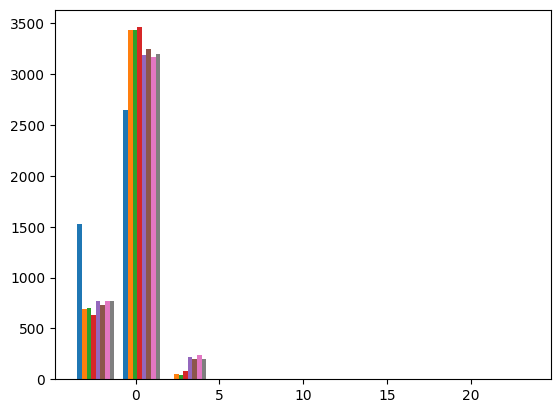

In [41]:
plt.hist(x=x_std)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f3924577310>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f3924577280>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f39245a0c10>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f39245a10c0>}

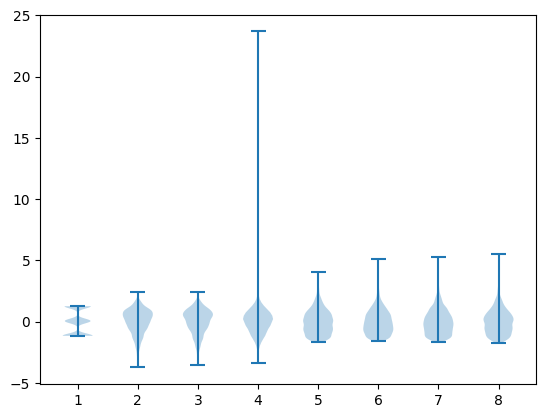

In [42]:
plt.violinplot(x_std)

Text(0.5, 1.0, 'Distribution of features')

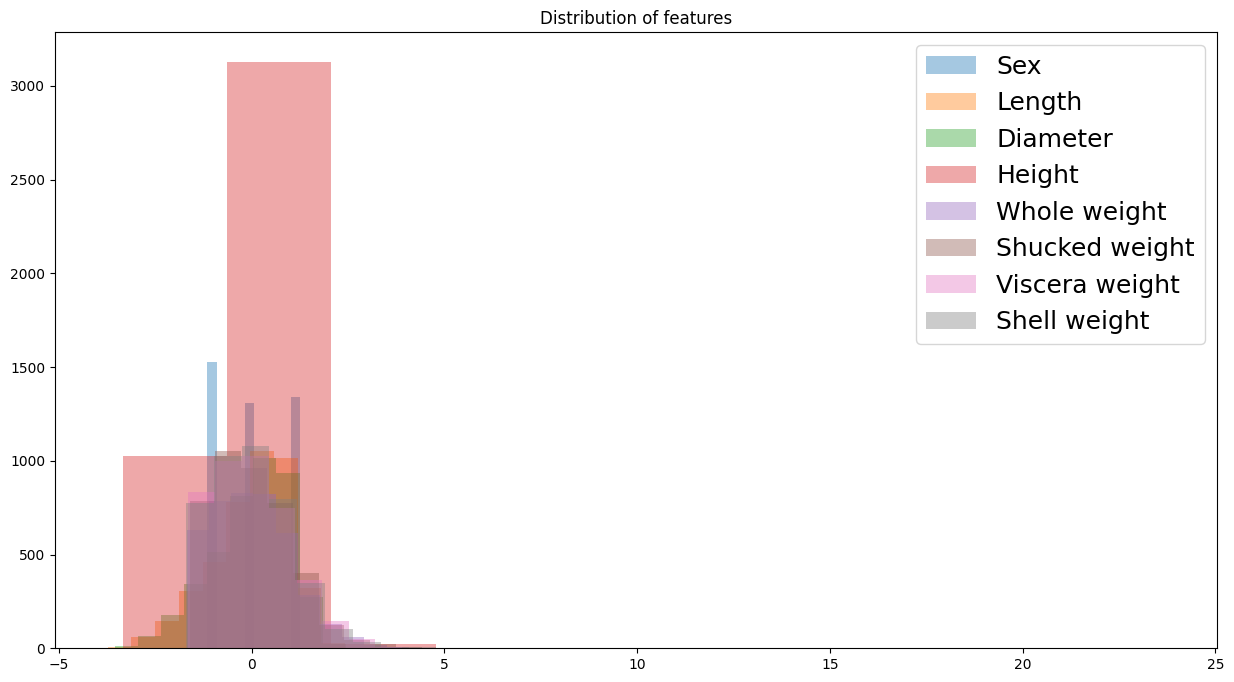

In [43]:
plt.figure(figsize=(15, 8))
data = pd.DataFrame(x_std, columns=in_cols)
for col_name in abalone_data:
  plt.hist(data[col_name].values, alpha=0.4)

plt.legend(in_cols, fontsize=18, loc='upper right', frameon=True)
plt.title('Distribution of features')



<Axes: ylabel='Density'>

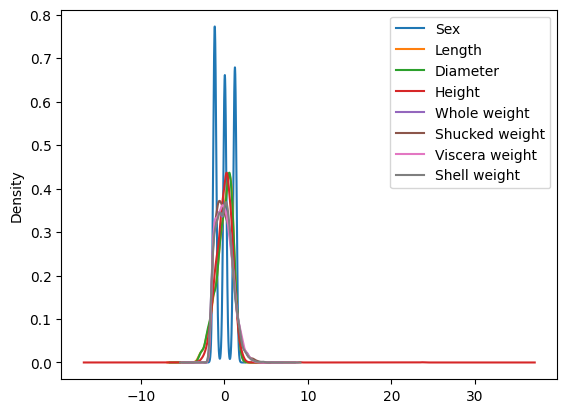

In [44]:
data.plot.kde()

4. Add dumy features

In [45]:
x = np.array([[7, 1], [1, 8], [2, 0], [9, 6]])
from sklearn.preprocessing import add_dummy_feature

x_new = add_dummy_feature(x)
x_new

array([[1., 7., 1.],
       [1., 1., 8.],
       [1., 2., 0.],
       [1., 9., 6.]])

5. Custom transformers

In [46]:
from sklearn.preprocessing import FunctionTransformer



### 7. Discretization


In [47]:
from sklearn.preprocessing import KBinsDiscretizer
wine_data = pd.read_csv('red_wine.csv')
enc = KBinsDiscretizer(n_bins=10, encode='onehot')
X = np.array(wine_data['chlorides']).reshape(-1, 1)
X_binned = enc.fit_transform(X)

In [48]:
X_binned

<1599x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1599 stored elements in Compressed Sparse Row format>

In [49]:
X_binned.toarray()[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

### Column transformers

In [51]:
x = [
  [20.0, 'male'],
  [11.2, 'female'],
  [15.6, 'female'],
  [13.0, 'male'],
  [18.6, 'male'],
  [16.4, 'female']
]
x = np.array(x)

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder

ct = ColumnTransformer([
  ('scaler', MaxAbsScaler(), [0]),
  ('pass', 'passthrough', [0]),
  ('encoder', OneHotEncoder(), [1])
]
)
ct.fit_transform(x)

array([['1.0', '20.0', '0.0', '1.0'],
       ['0.5599999999999999', '11.2', '1.0', '0.0'],
       ['0.78', '15.6', '1.0', '0.0'],
       ['0.65', '13.0', '0.0', '1.0'],
       ['0.93', '18.6', '0.0', '1.0'],
       ['0.82', '16.4', '1.0', '0.0']], dtype='<U32')

### Transformed target regressor

In [57]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y= True)
X, y = X[:2000, :], y[:2000] # selecting subset of data

transformer = MaxAbsScaler()

regressor = LinearRegression()

second_regressor = TransformedTargetRegressor(regressor=regressor, transformer= transformer)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

second_regressor.fit(X_train, y_train)

print('R2 score of raw labe regressor: {0:.2f}'.format(second_regressor.score(X_test, y_test)))


raw_target_regressor = LinearRegression().fit(X_train, y_train)

print('R2 score of transformed label regression: {0:.2f}'.format(raw_target_regressor.score(X_test, y_test)))



R2 score of raw labe regressor: 0.59
R2 score of transformed label regression: 0.59


### features selection

In [58]:
data = [
  {'age':4, 'height': 96.0},
  {'age': 1, 'height': 73.9},
  {'age': 3, 'height': 88.9},
  {'age': 2, 'height': 81.6}
]

dv = DictVectorizer(sparse= False)
data_transformed = dv.fit_transform(data)
np.var(data_transformed, axis=0)

array([ 1.25 , 67.735])